**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
fdiry = file.path(FD_RES, "source")
fglob = file.path(fdiry, "hic_intact*")
Sys.glob(fglob)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_intact_K562_deep"       
[2] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_intact_K562_ENCSR479XDG"

In [3]:
FOLDER="hic_intact_K562_ENCSR479XDG"
fdiry = file.path(FD_RES, "source", FOLDER)
for (fname in dir(fdiry)) {print(fname)}

[1] "ENCFF621AIY.hic"
[1] "K562.ENCSR479XDG.ENCFF126GED.contact_domains.bedpe.gz"
[1] "K562.ENCSR479XDG.ENCFF256ZMD.loops.bedpe.gz"


## Loop

In [4]:
fdiry = file.path(FD_RES, "source", FOLDER)
fname = "K562.ENCSR479XDG.ENCFF256ZMD.loops.bedpe.gz"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, col_names = FALSE, comment = "#")

dat_hic_loop = dat
print(dim(dat))
head(dat)

Rows: 46004 Columns: 33
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): X1, X4, X7, X8, X9, X10, X11
dbl (26): X2, X3, X5, X6, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 46004    33


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,102835000,102836000,chr10,102901000,102902000,.,.,.,.,⋯,500,102834600,102835200,102901400,102901700,102834700,102901500,4,0.0002171732,0
chr10,123583000,123584000,chr10,123967000,123968000,.,.,.,.,⋯,500,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,60780000,60782000,chr10,60828000,60830000,.,.,.,.,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,33050000,33051000,chr10,33067000,33068000,.,.,.,.,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,11412000,11414000,chr10,11472000,11474000,.,.,.,.,⋯,0,11412000,11412500,11471700,11472700,11412200,11472100,10,0.0088614312,0
chr10,45005000,45010000,chr10,45465000,45470000,.,.,.,.,⋯,2500,NA,NA,NA,NA,NA,NA,NA,NA,NA


## TAD

In [5]:
fdiry = file.path(FD_RES, "source", FOLDER)
fname = "K562.ENCSR479XDG.ENCFF126GED.contact_domains.bedpe.gz"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, col_names = FALSE, comment = "#")

dat_hic_tad = dat
print(dim(dat))
head(dat)

Rows: 4348 Columns: 16
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X7, X8, X9, X10
dbl (9): X2, X3, X5, X6, X12, X13, X14, X15, X16
num (1): X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 4348   16


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,89790000,90730000,chr10,89790000,90730000,.,.,.,.,2552550,0.4873343,0.4321875,0.3910142,0.4366181,0.5132139
chr10,117485000,118260000,chr10,117485000,118260000,.,.,.,.,2552550,0.4714600,0.4038806,0.4028087,0.4469099,0.4451019
chr10,51125000,52215000,chr10,51125000,52215000,.,.,.,.,2552550,0.5757076,0.3855988,0.3954850,0.4712260,0.4000834
chr10,112495000,113565000,chr10,112495000,113565000,.,.,.,.,2552550,0.6096007,0.3796908,0.3952655,0.5317584,0.4613188
chr10,84540000,86085000,chr10,84540000,86085000,.,.,.,.,2552550,0.5786491,0.4119491,0.3597105,0.4424142,0.4804162
chr10,94665000,95075000,chr10,94665000,95075000,.,.,.,.,2552550,0.6267519,0.3811024,0.3788707,0.5000000,0.4018583


## explore

**Loop distance and size**

In [6]:
dat = dat_hic_loop
dat = dat[,1:6]

cnames = c("Chrom1", "Start1", "End1", "Chrom2", "Start2", "End2")
colnames(dat) = cnames

dat = dat %>%
    dplyr::mutate(
        LoopA = paste0(Chrom1, ":", Start1, "-", End1),
        LoopB = paste0(Chrom2, ":", Start2, "-", End2),
        LengthA  = End1 - Start1,
        LengthB  = End2 - Start2,
        Distance = abs((Start1 + End1) / 2 - (Start2 + End2) / 2)
    ) 

dat_hic_loop_info = dat
print(dim(dat))
head(dat)

[1] 46004    11


Chrom1,Start1,End1,Chrom2,Start2,End2,LoopA,LoopB,LengthA,LengthB,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr10,102835000,102836000,chr10,102901000,102902000,chr10:102835000-102836000,chr10:102901000-102902000,1000,1000,66000
chr10,123583000,123584000,chr10,123967000,123968000,chr10:123583000-123584000,chr10:123967000-123968000,1000,1000,384000
chr10,60780000,60782000,chr10,60828000,60830000,chr10:60780000-60782000,chr10:60828000-60830000,2000,2000,48000
chr10,33050000,33051000,chr10,33067000,33068000,chr10:33050000-33051000,chr10:33067000-33068000,1000,1000,17000
chr10,11412000,11414000,chr10,11472000,11474000,chr10:11412000-11414000,chr10:11472000-11474000,2000,2000,60000
chr10,45005000,45010000,chr10,45465000,45470000,chr10:45005000-45010000,chr10:45465000-45470000,5000,5000,460000


**Size = 1kb-10kb**

In [7]:
table(dat$LengthA, dat$LengthB)

       
         1000  2000  5000 10000
  1000  14686     0     0     0
  2000      0 10059     0     0
  5000      0     0 13906     0
  10000     0     0     0  7353

In [8]:
table(dat$LengthA)


 1000  2000  5000 10000 
14686 10059 13906  7353 

In [10]:
table(dat$Chrom1, dat$Chrom2)

       
        chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19 chr2
  chr1  5380     0     0     0     0     0     0     0     0     0     0    0
  chr10    0  1975     0     0     0     0     0     0     0     0     0    0
  chr11    0     0  2537     0     0     0     0     0     0     0     0    0
  chr12    0     0     0  2246     0     0     0     0     0     0     0    0
  chr13    0     0     0     0   771     0     0     0     0     0     0    0
  chr14    0     0     0     0     0  1138     0     0     0     0     0    0
  chr15    0     0     0     0     0     0  1407     0     0     0     0    0
  chr16    0     0     0     0     0     0     0  1173     0     0     0    0
  chr17    0     0     0     0     0     0     0     0  1574     0     0    0
  chr18    0     0     0     0     0     0     0     0     0   843     0    0
  chr19    0     0     0     0     0     0     0     0     0     0  1255    0
  chr2     0     0     0     0     0     0     0     0  

**Distance: 8kb-9Mb, Median = 150kb**

In [11]:
summary(dat$Distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8000   65000  148000  276807  319250 9090000 

In [12]:
summary(dat$Distance)/1000

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    65.0   148.0   276.8   319.2  9090.0 

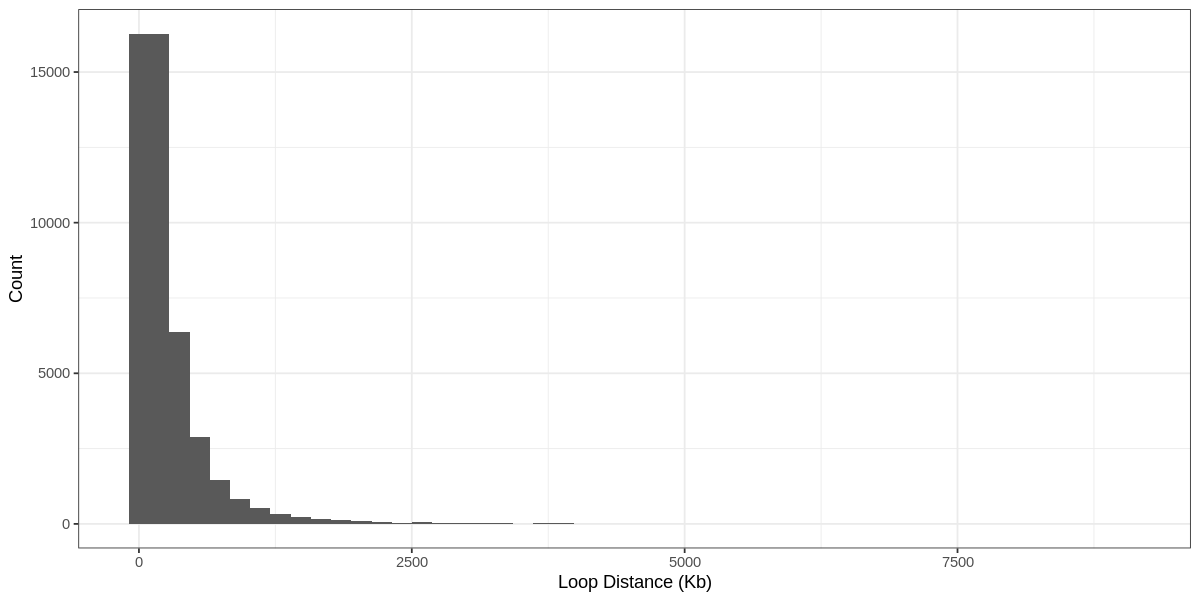

In [13]:
options(repr.plot.height = 5, repr.plot.width = 10)
ggplot(dat, aes(x=Distance / 1000)) + 
    geom_histogram(bins = 50) + 
    labs(x="Loop Distance (Kb)", y="Count") +
    theme_bw()

## Save results

In [14]:
dat = dat_hic_loop_info
head(dat)

Chrom1,Start1,End1,Chrom2,Start2,End2,LoopA,LoopB,LengthA,LengthB,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr10,102835000,102836000,chr10,102901000,102902000,chr10:102835000-102836000,chr10:102901000-102902000,1000,1000,66000
chr10,123583000,123584000,chr10,123967000,123968000,chr10:123583000-123584000,chr10:123967000-123968000,1000,1000,384000
chr10,60780000,60782000,chr10,60828000,60830000,chr10:60780000-60782000,chr10:60828000-60830000,2000,2000,48000
chr10,33050000,33051000,chr10,33067000,33068000,chr10:33050000-33051000,chr10:33067000-33068000,1000,1000,17000
chr10,11412000,11414000,chr10,11472000,11474000,chr10:11412000-11414000,chr10:11472000-11474000,2000,2000,60000
chr10,45005000,45010000,chr10,45465000,45470000,chr10:45005000-45010000,chr10:45465000-45470000,5000,5000,460000


In [15]:
dat_loop_A = dat_hic_loop_info %>% dplyr::select(Chrom1, Start1, End1) %>% dplyr::arrange(Chrom1, Start1, End1)
dat_loop_B = dat_hic_loop_info %>% dplyr::select(Chrom2, Start2, End2) %>% dplyr::arrange(Chrom2, Start2, End2)

In [16]:
head(dat_loop_A)

Chrom1,Start1,End1
<chr>,<dbl>,<dbl>
chr1,770000,780000
chr1,904000,906000
chr1,920000,925000
chr1,980000,990000
chr1,984000,985000
chr1,1000000,1005000


In [17]:
head(dat_loop_B)

Chrom2,Start2,End2
<chr>,<dbl>,<dbl>
chr1,840000,850000
chr1,976000,978000
chr1,1060000,1065000
chr1,1060000,1065000
chr1,1060000,1065000
chr1,1062000,1063000


In [18]:
fdiry = file.path(FD_RES, "results", "region", "hic_intact_ENCSR479XDG")
dir(fdiry)

[1] "contact_domains" "loop"            "tmp"

In [19]:
fdiry = file.path(FD_RES, "results", "region", "hic_intact_ENCSR479XDG", "loop")
fname = "loopA.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_loop_A
write_tsv(dat, fpath, col_names = FALSE)

In [20]:
fdiry = file.path(FD_RES, "results", "region", "hic_intact_ENCSR479XDG", "loop")
fname = "loopB.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_loop_B
write_tsv(dat, fpath, col_names = FALSE)

In [21]:
fdiry = file.path(FD_RES, "results", "region", "hic_intact_ENCSR479XDG", "loop")
fname = "loop.tsv"
fpath = file.path(fdiry, fname)

dat = dat_hic_loop_info
write_tsv(dat, fpath)